#**NATURAL LANGUAGE PROCESSING - CAPSTONE PROJECT**

#**AIML-CHATBOT INTERFACE**

#**DOMAIN: Industrial safety. NLP based Chatbot**

• CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment

 DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Gender: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.

• PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description

#**‣ Input: Interim report**

#**Process: Step 1: Import the data**

In [3]:
#for reading data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling
import calendar

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_health=pd.read_csv("/content/drive/My Drive/AIML/Capstone Project Data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df_health.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [6]:
print("No. of Rows and Columns in dataframe")
df_health.shape

No. of Rows and Columns in dataframe


(425, 11)

In [7]:
print("No. of Elements in dataframe")
df_health.size

No. of Elements in dataframe


4675

In [8]:
!pip install --user pandas-profiling

In [10]:
#data.profile_report()
#df_health.profile_report()

#**Step 2: Data cleansing**

In [11]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [12]:
df_health.isnull().values.any() 

False

In [13]:
df_health.isna().values.any()

False

In [14]:
df_health.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [15]:
df_health.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [16]:
df_health.duplicated().sum()

0

In [17]:
df_health.describe()

,Unnamed: 0
count,425.000000
mean,224.084706
std,125.526786
min,0.000000
25%,118.000000
50%,226.000000
75%,332.000000
max,438.000000


In [18]:
df_health.describe(include=['object'])

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,90,241,316,143,403,189,232,3


In [19]:
#Dropping this column as it will be 1-1 mapping and not useful while training or testing the model
df_health=df_health.drop('Unnamed: 0',axis=1)
df_health.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [20]:
df_health.rename(columns = {'Genre':'Gender'}, inplace = True)
df_health.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [21]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame

df_health.rename(columns={'Data':'Date','Countries':'Country','Genre':'Gender','Employee or Third Party':'Employee Type'},inplace=True)
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


 # **Step 3: Data preprocessing**

In [22]:
df_health.Date.max()

'2017-07-09 00:00:00'

In [23]:
df_health.Date.min()

'2016-01-01 00:00:00'

In [24]:
df_health['Date']=pd.to_datetime(df_health['Date'])
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [25]:
month_order={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

In [26]:
def month_n(a):
    b=calendar.month_name[a]
    return b

x=[]
for i in range (0, len(df_health.Date)):
                x.append(month_n(df_health.Date.loc[i].month))

y=[]
for i in range (0, len(df_health.Date)):
                y.append(df_health.Date.loc[i].year)
            
df_health['month']=x
df_health['year']=y

df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,month,year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,January,2016
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,January,2016
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,January,2016
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,January,2016
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,January,2016


In [28]:
#This shows we have balanced data. 
sns.countplot(x='Accident Level',data=df_health)

In [29]:
#Dealing with categorical variable
#check for unique values in target varibale.
#It contains four values :
df_health['Accident Level'].unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [30]:
#We can maintain the uniformality by giving the same name to class values
df_health['Accident Level']=df_health['Accident Level'].replace(to_replace=['I','II','III','IV','V'],value=['0','1','2','3','4'])

In [31]:
#check frequency distribution of target variable. 
#check whether data is balanced or imbalanced.
#316 are not severe and 8 are severe cases
df_health['Accident Level'].value_counts()

0    316
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [32]:
#We can check the imbalaned data by caluclating percentage of two classes
df_health['Accident Level'].value_counts(normalize=True)

0    0.743529
1    0.094118
2    0.072941
3    0.070588
4    0.018824
Name: Accident Level, dtype: float64

In [33]:
#This shows we have balanced data. 
sns.countplot(x='Accident Level',data=df_health)

In [34]:
#check frequency distribution of target variable. 
#check whether data is balanced or imbalanced.
#316 are not severe and 8 are severe cases
df_health['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

In [35]:
#This shows we have balanced data. 
sns.countplot(x='Gender',data=df_health)

In [36]:
df_health['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [37]:
#This shows we have balanced data. 
sns.countplot(x='Industry Sector',data=df_health)

In [38]:
df_health['Employee Type'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee Type, dtype: int64

In [39]:
#We can maintain the uniformality by giving the same name to class values
#df_health['Employee or Third Party']=df_health['Employee or Third Party'].replace(to_replace=['Third Party (Remote)'],value=['Third Party'])

In [40]:
#df_health['Employee or Third Party'].unique()

In [41]:
#df_health['Employee or Third Party'].value_counts()

In [42]:
sns.countplot(x='Employee Type',data=df_health)

In [ ]:
df_health['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

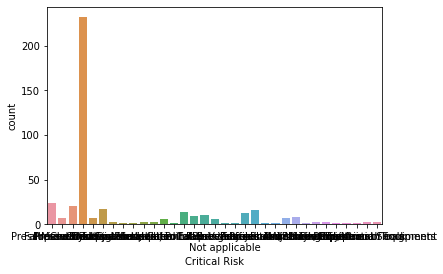

In [ ]:
sns.countplot(x='Critical Risk',data=df_health)

In [ ]:
df_health['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

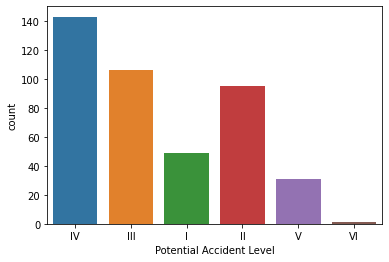

In [ ]:
sns.countplot(x='Potential Accident Level',data=df_health)

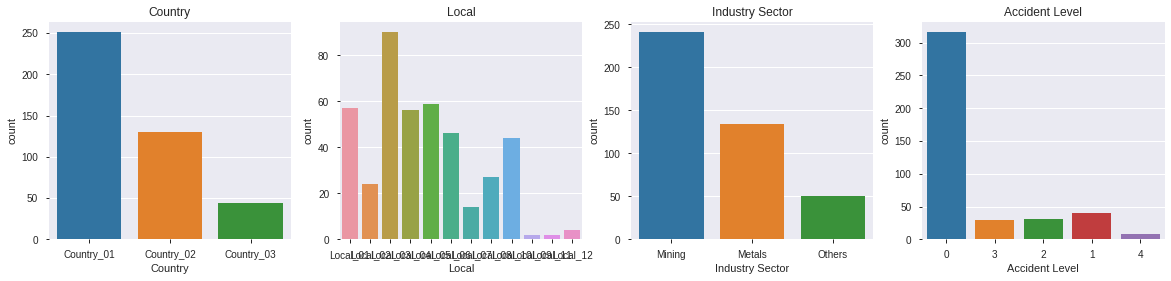

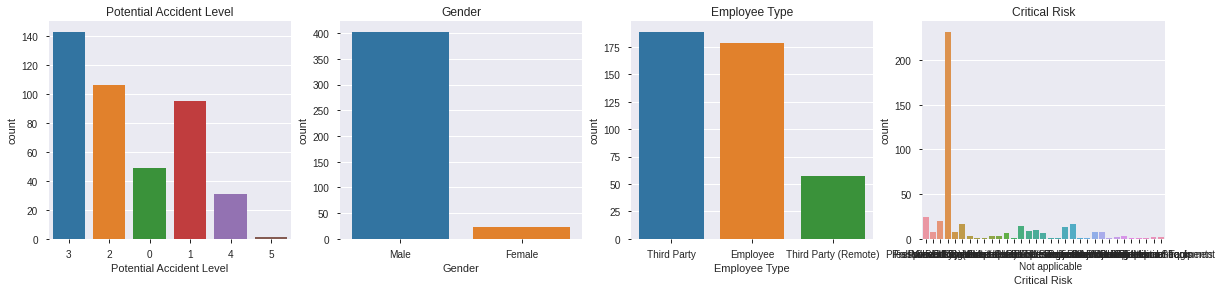

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Country")
sns.countplot(x='Country',data=df_health)

plt.subplot(1,4,2)
plt.title("Local")
sns.countplot(x='Local',data=df_health)

plt.subplot(1,4,3)
plt.title("Industry Sector")
sns.countplot(x='Industry Sector',data=df_health)

plt.subplot(1,4,4)
plt.title("Accident Level")
sns.countplot(x='Accident Level',data=df_health)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Potential Accident Level")
sns.countplot(x='Potential Accident Level',data=df_health)

plt.subplot(1,4,2)
plt.title("Gender")
sns.countplot(x='Gender',data=df_health)

plt.subplot(1,4,3)
plt.title("Employee Type")
sns.countplot(x='Employee Type',data=df_health)

plt.subplot(1,4,4)
plt.title("Critical Risk")
sns.countplot(x='Critical Risk',data=df_health)

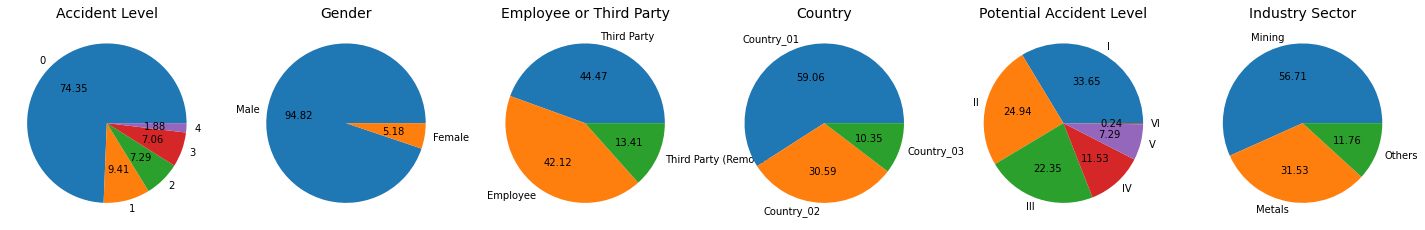

In [ ]:
fig=plt.figure(figsize=(25,15))

ax1=fig.add_subplot(1,6,1)
plt.pie(x=df_health['Accident Level'].value_counts(),autopct="%.2f",labels=['0','1','2','3','4'])
plt.title("origin Distribution",fontsize=14)
plt.title("Accident Level",fontsize=14)

ax2=fig.add_subplot(1,6,2)
plt.pie(x=df_health['Gender'].value_counts(),autopct="%.2f",labels=df_health['Gender'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Gender',size=14)

ax3=fig.add_subplot(1,6,3)
plt.pie(x=df_health['Employee Type'].value_counts(),autopct="%.2f",labels=df_health['Employee Type'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title("Employee or Third Party",fontsize=14)

ax4=fig.add_subplot(1,6,4)
plt.pie(x=df_health['Country'].value_counts(),autopct="%.2f",labels=df_health['Country'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Country',size=14)

ax5=fig.add_subplot(1,6,5)
plt.pie(x=df_health['Potential Accident Level'].value_counts(),autopct="%.2f",labels=['I','II','III','IV','V','VI'])
plt.title("origin Distribution",fontsize=14)
plt.title('Potential Accident Level',size=14)

ax6=fig.add_subplot(1,6,6)
plt.pie(x=df_health['Industry Sector'].value_counts(),autopct="%.2f",labels=df_health['Industry Sector'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Industry Sector',size=14)

plt.show()

TypeError: ignored

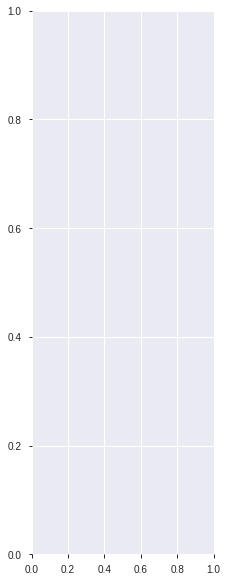

In [ ]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,4,1)
sns.boxplot(df_health['Accident Level'],color='green',ax=ax1)

ax2=fig.add_subplot(1,4,2)
sns.boxplot(df_health['Potential Accident Level'],color='green',ax=ax2)

TypeError: ignored

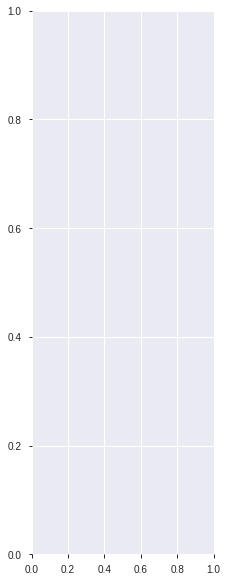

In [ ]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(1,4,1)
sns.boxplot(df_health['Country'],color='green',ax=ax1)

ax2=fig.add_subplot(1,4,2)
sns.boxplot(df_health['Industry Sector'],color='green',ax=ax2)

ax3=fig.add_subplot(1,4,3)
sns.boxplot(df_health['Accident Level'],color='green',ax=ax3)

ax4=fig.add_subplot(1,4,4)
sns.boxplot(df_health['Potential Accident Level'],color='green',ax=ax4)

fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(1,4,1)
sns.boxplot(df_health['Gender'],color='green',ax=ax1)

ax2=fig.add_subplot(1,4,2)
sns.boxplot(df_health['Employee Type'],color='green',ax=ax2)

ax3=fig.add_subplot(1,4,3)
sns.boxplot(df_health['Critical Risk'],color='green',ax=ax3)

#ax4=fig.add_subplot(1,4,4)
#sns.distplot(df_health['Ptential Accident Level'],color='green',ax=ax4)

In [ ]:
#fig=plt.figure(figsize=(20,10))

#ax1=fig.add_subplot(2,3,1)
#sns.stripplot(x='Accident Level',y='Gender',data=df_health,ax=ax1)

#ax2=fig.add_subplot(2,3,2)
#sns.stripplot(x='Accident Level',y='Employee or Third Party',data=df_health,ax=ax2)



In [ ]:
order={'I':1, 'II':2, 'III':3, 'IV':4, 'V':5}

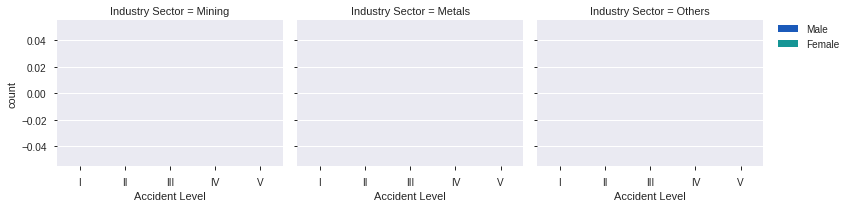

In [ ]:
fig=sns.FacetGrid(df_health,aspect=1.2,palette="winter", hue='Gender',col='Industry Sector', legend_out=True)
fig.map(sns.countplot, 'Accident Level',order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

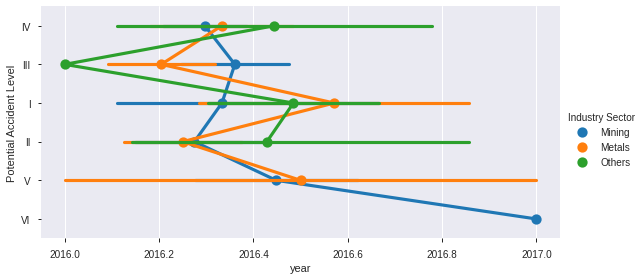

In [ ]:
sns.factorplot(x='year', y='Potential Accident Level', data=df_health, hue='Industry Sector', aspect=2, size=4)

In [ ]:
#We can maintain the uniformality by giving the same name to class values
df_health['Potential Accident Level']=df_health['Potential Accident Level'].replace(to_replace=['I','II','III','IV','V','VI'],value=['0','1','2','3','4','5'])
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,month,year
0,2016-01-01,Country_01,Local_01,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,January,2016
1,2016-01-02,Country_02,Local_02,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,January,2016
2,2016-01-06,Country_01,Local_03,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,January,2016
3,2016-01-08,Country_01,Local_04,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,January,2016
4,2016-01-10,Country_01,Local_04,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,January,2016


In [ ]:
#We can maintain the uniformality by giving the same name to class values
df_health['month']=df_health['month'].replace(to_replace=['January'],value=['0','1','2','3','4','5'])
df_health.head()

facetgrid to be added

#**Pivot Table for Analysis**

#**Q.Which country/plant had more accidents?**

Absolute Value

In [ ]:
# Calculate amount of plants per country

df_accident_per_country = pd.pivot_table(df_health, index=['Country'], columns=['Industry Sector'], values='Date', aggfunc='count')
df_accident_per_country

Industry Sector,Metals,Mining,Others
Country,,,
Country_01,46.0,203.0,2.0
Country_02,88.0,38.0,4.0
Country_03,NaN,NaN,44.0


In [ ]:
# Calculate amount of plants per country
#df_plants_per_country = df[['Countries', 'Industry Sector', 'Local']].drop_duplicates()
df_plants_per_country1= df_health.groupby(['Industry Sector','Country'])['Industry Sector'].count()
df_plants_per_country1=df_plants_per_country1.to_frame('Amount of accidents').reset_index()
df_plot=df_plants_per_country1.pivot_table(index='Industry Sector', columns='Country', values='Amount of accidents')
df_plot

Country,Country_01,Country_02,Country_03
Industry Sector,,,
Metals,46.0,88.0,NaN
Mining,203.0,38.0,NaN
Others,2.0,4.0,44.0


Relative Value

In [ ]:
# Calculate amount of plants per country
#df_plants_per_country = df[['Countries', 'Industry Sector', 'Local']].drop_duplicates()
#df_plants_per_country = df_plants_per_country.groupby(['Countries', 'Industry Sector'])['Local'].count().to_frame('Amount of plants').reset_index()

# Calculate amount of accidents per country
#df_accidents_per_country = df.groupby(['Countries', 'Industry Sector'])['Local'].count().to_frame('Amount of accidents').reset_index()

# Calculate the ratio amount of accidents per plants in a given country 
#dff = df_accidents_per_country.merge(df_plants_per_country, how='left', on=['Countries', 'Industry Sector'])
#dff['Ratio accidents per plant'] = dff['Amount of accidents'] / dff['Amount of plants']

# Show in pivot form
#pd.pivot_table(dff, index='Countries', columns='Industry Sector', values='Ratio accidents per plant')

#**Q. Which Gender had more accidents?**

In [ ]:
#Calculate amount of accidents per gender
df_accidents_per_gender=df_health.groupby(['Industry Sector', 'Gender'])['Industry Sector'].count()
df_accidents_per_gender = df_accidents_per_gender.to_frame('Amount of accidents').reset_index()
df_plot=df_accidents_per_gender.pivot_table(index='Industry Sector', columns='Gender', values='Amount of accidents')
df_plot

Gender,Female,Male
Industry Sector,,
Metals,13,121
Mining,5,236
Others,4,46


#**Q. Which country had more severe cases?**

In [ ]:
# Calculate amount of accidents per country
#df_plants_per_country = df[['Countries', 'Industry Sector', 'Local']].drop_duplicates()
df_plants_per_country1= df_health.groupby(['Potential Accident Level','Country'])['Potential Accident Level'].count()
df_plants_per_country1=df_plants_per_country1.to_frame('Amount of accidents').reset_index()
df_plot=df_plants_per_country1.pivot_table(index='Potential Accident Level', columns='Country', values='Amount of accidents')
df_plot

Country,Country_01,Country_02,Country_03
Potential Accident Level,,,
I,10.0,7.0,32.0
II,51.0,40.0,4.0
III,64.0,41.0,1.0
IV,103.0,33.0,7.0
V,22.0,9.0,NaN
VI,1.0,NaN,NaN


#**Q. Which plant had more severe cases?**


In [ ]:
df_plants_per_country1= df_health.groupby(['Potential Accident Level','Industry Sector'])['Potential Accident Level'].count()
df_plants_per_country1=df_plants_per_country1.to_frame('Amount of accidents').reset_index()
df_plot=df_plants_per_country1.pivot_table(index='Potential Accident Level', columns='Industry Sector', values='Amount of accidents')
df_plot

Industry Sector,Metals,Mining,Others
Potential Accident Level,,,
I,7.0,9.0,33.0
II,48.0,40.0,7.0
III,44.0,61.0,1.0
IV,33.0,101.0,9.0
V,2.0,29.0,NaN
VI,NaN,1.0,NaN


In [ ]:
# Calculate amount of accidents per level

df_plants_per_country1= df_health.groupby(['Industry Sector','Accident Level'])['Industry Sector'].count()
df_plants_per_country1=df_plants_per_country1.to_frame('Amount of accidents').reset_index()
df_plot=df_plants_per_country1.pivot_table(index='Industry Sector', columns='Accident Level', values='Amount of accidents')
df_plot

Accident Level,0,1,2,3,4
Industry Sector,,,,,
Metals,107.0,12.0,7.0,7.0,1.0
Mining,167.0,26.0,20.0,21.0,7.0
Others,42.0,2.0,4.0,2.0,NaN


In [ ]:
df_accident_per_month=df_health.pivot_table(index='month', columns=[ 'year','Accident Level'], aggfunc='count')['Country']
df_accident_per_month

year            2016                      2017                    
Accident Level     0    1    2    3    4     0    1    2    3    4
month                                                             
April           24.0  1.0  3.0  1.0  NaN  20.0  1.0  NaN  2.0  NaN
August          15.0  3.0  2.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN
December        18.0  2.0  3.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN
February        23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  NaN
January         11.0  NaN  NaN  1.0  NaN  22.0  2.0  2.0  1.0  1.0
July            11.0  1.0  4.0  2.0  1.0   5.0  NaN  NaN  NaN  NaN
June            26.0  1.0  NaN  3.0  1.0  15.0  2.0  2.0  1.0  NaN
March           24.0  4.0  3.0  3.0  NaN  13.0  3.0  NaN  NaN  3.0
May             23.0  2.0  NaN  1.0  NaN   9.0  1.0  1.0  3.0  1.0
November         9.0  1.0  1.0  2.0  NaN   NaN  NaN  NaN  NaN  NaN
October         11.0  4.0  4.0  2.0  NaN   NaN  NaN  NaN  NaN  NaN
September       18.0  3.0  2.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN

In [ ]:
n=np.nan
df_accident_per_month.replace(n,0,inplace=True)
df_accident_per_month

year            2016                      2017                    
Accident Level     0    1    2    3    4     0    1    2    3    4
month                                                             
April           24.0  1.0  3.0  1.0  0.0  20.0  1.0  0.0  2.0  0.0
August          15.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0
December        18.0  2.0  3.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0
February        23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  0.0
January         11.0  0.0  0.0  1.0  0.0  22.0  2.0  2.0  1.0  1.0
July            11.0  1.0  4.0  2.0  1.0   5.0  0.0  0.0  0.0  0.0
June            26.0  1.0  0.0  3.0  1.0  15.0  2.0  2.0  1.0  0.0
March           24.0  4.0  3.0  3.0  0.0  13.0  3.0  0.0  0.0  3.0
May             23.0  2.0  0.0  1.0  0.0   9.0  1.0  1.0  3.0  1.0
November         9.0  1.0  1.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0
October         11.0  4.0  4.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0
September       18.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0

Preprocessing

In [ ]:
#Eliminating special characters and numbers 
import re
df_health['description_without_symbol_num']=new_df['Desciption'].apply(lambda x: re.sub(r'[!@#$(),"%*?:;_~+-/`0-9]+',' ',x))
df_health['clean_data']=new_df['Descrption'].apply(lambda x: re.sub(r'[!@#$(),"%*?:;_~+-/`0-9]+',' ',x))
df_health.head()

In [ ]:
#Lowercase all texual data
new_df['text_lower']=new_df['Description'].apply(lambda x: x.lower())
new_df['clean_data']=new_df['clean_data'].apply(lambda x: x.lower())
new_df.head()

In [ ]:
# strip() is used to remove all the leading and trailing spaces from a string
new_df['remo_space']=new_df['Description'].apply(lambda x: x.strip())
new_df['clean_data']=new_df['clean_data'].apply(lambda x: x.strip())
new_df.head()

In [ ]:
#Actual data before cleaning
print('Actual Data :{}'.format(new_df['Description'][0]))

In [ ]:
# Data after cleaning
print('Cleaned Data :{}'.format(new_df['clean_data'][0]))